In [74]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [75]:
#Load the data set
bank_data = pd.read_csv("C:\\Users\\lenovo\\Downloads\\bank-full (2).csv",sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [76]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [77]:
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [78]:
#Drop the "Case number" colum as it is not required
bank_data.drop(['day','month'],inplace=True,axis = 1)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [79]:
#Shape of the data set
bank_data.shape

(45211, 15)

In [80]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# There is a no null values

In [81]:
bank_data[bank_data.isnull().any(axis=1)]

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y


In [82]:
len(bank_data[bank_data.isnull().any(axis=1)])/45211

0.0

In [83]:
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no


In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
label = LabelEncoder()
print(label)

LabelEncoder()


In [86]:
bank_data['job']=label.fit_transform(bank_data.job)
bank_data['marital']=label.fit_transform(bank_data.marital)
bank_data['education']=label.fit_transform(bank_data.education)
bank_data['default']=label.fit_transform(bank_data.default) 
bank_data['balance']=label.fit_transform(bank_data.balance)
bank_data['housing']=label.fit_transform(bank_data.housing)
bank_data['loan']=label.fit_transform(bank_data.loan) 
bank_data['contact']=label.fit_transform(bank_data.contact)
bank_data['duration']=label.fit_transform(bank_data.duration)
bank_data['campaign']=label.fit_transform(bank_data.campaign)
bank_data['pdays']=label.fit_transform(bank_data.pdays)
bank_data['previous']=label.fit_transform(bank_data.previous)
bank_data['poutcome']=label.fit_transform(bank_data.poutcome)
bank_data['y']=label.fit_transform(bank_data.y)
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,3036,1,0,2,261,0,0,0,3,0
1,44,9,2,1,0,945,1,0,2,151,0,0,0,3,0
2,33,2,1,1,0,918,1,1,2,76,0,0,0,3,0
3,47,1,1,3,0,2420,1,0,2,92,0,0,0,3,0
4,33,11,2,3,0,917,0,0,2,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,1741,0,0,0,975,2,0,0,3,1
45207,71,5,0,0,0,2639,0,0,0,456,1,0,0,3,1
45208,72,5,1,1,0,5455,0,0,0,1116,4,181,3,2,1
45209,57,1,1,1,0,1584,0,0,1,508,3,0,0,3,0


In [87]:
#Logistic regression and fit the model
X = bank_data.iloc[:,:-1]
Y = bank_data.iloc[:,-1]

In [88]:
#logistic regression and fit the model
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [89]:
X

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,3036,1,0,2,261,0,0,0,3
1,44,9,2,1,0,945,1,0,2,151,0,0,0,3
2,33,2,1,1,0,918,1,1,2,76,0,0,0,3
3,47,1,1,3,0,2420,1,0,2,92,0,0,0,3
4,33,11,2,3,0,917,0,0,2,198,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,1741,0,0,0,975,2,0,0,3
45207,71,5,0,0,0,2639,0,0,0,456,1,0,0,3
45208,72,5,1,1,0,5455,0,0,0,1116,4,181,3,2
45209,57,1,1,1,0,1584,0,0,1,508,3,0,0,3


In [90]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

# Model Buliding

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y)


In [92]:
#from sklearn.linear_model import LogisticRegression
#classifier=LogisticRegression()
#classifier.fit(X,Y)

In [93]:
X.shape,Y.shape

((45211, 14), (45211,))

In [94]:
x_train.shape , y_train.shape

((33908, 14), (33908,))

# Model Traning

In [95]:
Model_traning=LogisticRegression(class_weight={0:1,1:3})

In [96]:
Model_traning.fit(x_train , y_train)

LogisticRegression(class_weight={0: 1, 1: 3})

In [97]:
Model_traning.coef_

array([[-9.03334070e-03,  1.84184420e-02, -2.50341181e-01,
         2.45904708e-02, -1.78825487e-02,  1.26870242e-04,
        -6.58368944e-01, -1.98184137e-01, -6.85713955e-01,
         4.74170275e-03, -1.09365503e-01, -1.92547908e-03,
         8.62283629e-02, -4.81305458e-01]])

# Model Test

# traning accuracy

In [98]:
y_pred_train=Model_traning.predict(x_train)

In [99]:
accuracy_score(y_train,y_pred_train)

0.8656364279815972

In [100]:
confusion_matrix(y_train,y_pred_train)

array([[27432,  2497],
       [ 2059,  1920]], dtype=int64)

In [104]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     29929
           1       0.43      0.48      0.46      3979

    accuracy                           0.87     33908
   macro avg       0.68      0.70      0.69     33908
weighted avg       0.87      0.87      0.87     33908



In [105]:
#THE MODEL ACCURANCY IS CALCULATED BY (A+B)/(A+B+C+D)
(27481+1968)/(27481+2449+2010+1968)


0.8684971098265896

Roc = Receiver operating Curve
#Auc = Area Under Curve
#The greater the area under the curve,the better the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color ='green')
auc = roc_auc_score(y_train,y_pred_train)

plt.plot(fpr,tpr,color = 'green',label='logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate or [1-True Negative Rate]")
plt.ylabel('True Positive Rate')
plt.show()

print("auc accuracy:",auc)

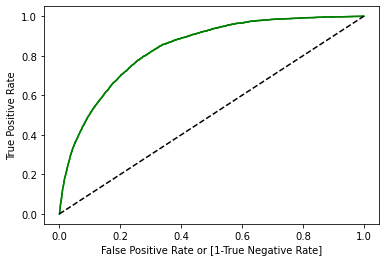

auc accuracy: 0.6995512568150419


In [106]:
#Roc = Receiver operating Curve
#Auc = Area Under Curve
#The greater the area under the curve,the better the model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])
plt.plot(fpr,tpr,color ='green')
auc = roc_auc_score(y_train,y_pred_train)

plt.plot(fpr,tpr,color = 'green',label='logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate or [1-True Negative Rate]")
plt.ylabel('True Positive Rate')
plt.show()

print("auc accuracy:",auc)